In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split;
from keras.models import Sequential
from keras.layers import Dense


In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
df=pd.read_csv("/content/gdrive/MyDrive/WEO Growth/data/OLSFFN.csv")
df.head()

,year,predicted,actual
0,1998,3.6461,4.013
1,1999,2.4967,2.577
2,2002,2.7252,2.446
3,2004,3.7768,4.256
4,2005,4.3948,5.422


In [44]:
TargetVariable=['actual']
Predictors=['predicted']

In [45]:
X=df[Predictors].values
y=df[TargetVariable].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16, 1)
(16, 1)
(7, 1)
(7, 1)


In [47]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=1, input_dim=1, kernel_initializer='normal', activation='relu'))
 # The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=[tf.keras.metrics.Accuracy()])
 
# Fitting the ANN to the Training set
history=model.fit(X_train, y_train ,batch_size = 1, epochs = 150, verbose=2,validation_split=0.2)

Epoch 1/150
12/12 - 0s - loss: 9.5526 - accuracy: 0.0000e+00 - val_loss: 0.7018 - val_accuracy: 0.0000e+00 - 311ms/epoch - 26ms/step
Epoch 2/150
12/12 - 0s - loss: 0.8572 - accuracy: 0.0000e+00 - val_loss: 0.6290 - val_accuracy: 0.0000e+00 - 50ms/epoch - 4ms/step
Epoch 3/150
12/12 - 0s - loss: 1.1625 - accuracy: 0.0000e+00 - val_loss: 0.2734 - val_accuracy: 0.0000e+00 - 28ms/epoch - 2ms/step
Epoch 4/150
12/12 - 0s - loss: 0.7357 - accuracy: 0.0000e+00 - val_loss: 0.2744 - val_accuracy: 0.0000e+00 - 36ms/epoch - 3ms/step
Epoch 5/150
12/12 - 0s - loss: 0.7914 - accuracy: 0.0000e+00 - val_loss: 0.3986 - val_accuracy: 0.0000e+00 - 29ms/epoch - 2ms/step
Epoch 6/150
12/12 - 0s - loss: 1.0150 - accuracy: 0.0000e+00 - val_loss: 1.2997 - val_accuracy: 0.0000e+00 - 29ms/epoch - 2ms/step
Epoch 7/150
12/12 - 0s - loss: 0.6973 - accuracy: 0.0000e+00 - val_loss: 0.4941 - val_accuracy: 0.0000e+00 - 29ms/epoch - 2ms/step
Epoch 8/150
12/12 - 0s - loss: 1.0609 - accuracy: 0.0000e+00 - val_loss: 0.2392 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


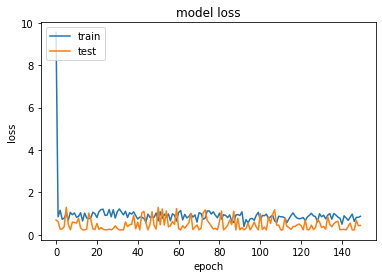

In [48]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
Predictions=model.predict(X_test)
Predictions


1/1 [==============================] - 0s 56ms/step


array([[4.3658977],
       [4.8934555],
       [2.6688943],
       [3.5278206],
       [3.8529515],
       [3.0528135],
       [3.9068694]], dtype=float32)

In [50]:
import numpy as np

def mse(y_test, Predictions): 
    y_test, Predictions = np.array(y_test), np.array(Predictions)
    return np.square(np.subtract(y_test,Predictions)).mean()


In [51]:
mse(y_test, Predictions)

0.8597562041493291